# Python Basics and Numpy - Assignment 1

## Author: Samuel Hickey
## Date:   9/4/2022

# Problem Description: 
    Create a word-document matrix (A) from a text dataset. If the vocabulary
    (set of unique words) size is M and the number of documents is N, then
    the size of this matrix will be M X N. Use numpy data structures to create
    and manipulate this matrix.

# Dataset:
    Twenty short-text files

# Output:
    1.  Matrix A, Vocabulary size (M), Number of documents (N)
    2.  Use heatmap like visualization to display the word-document matrix
    3.  TF-IDF scores for each term in the vocabulary
    4.  The 3 documents found to be most similar to "10.txt" via cosine similarity
    5.  Using matrix manipulation and numpy create a new matrix B of size N X N,
            where Bij will represent the number of common words between documents
            i and j. Note: the diagonal of B should always have the highest value

## Imports

In [3]:
import logging.config
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

## Functions

In [4]:
def cleaner(text: str) -> list:
    '''
    Cleans a string

    text: str - a string to clean
    '''
    p = '''!()-[]{};:'"\,<>./?@#$%^&*_~0123456789�'''
    return text.translate(str.maketrans('', '', p)) \
            .lower() \
            .split()


def load_documents(path: str) -> dict:
    '''
    Loads all files from a directory

    path: str - relative path to a directory
    '''
    docs: dict = dict()
    for document in os.listdir(path):
        with open(os.path.join(path, document), 'r') as f:
            docs[document] = cleaner(f.read())
    
    return docs

## Setup

In [13]:
# Retrieving documents
files_dir: str = os.path.join(os.getcwd(), 'input')
docs = load_documents(files_dir)

# Combining lexicons
vocab = []
for lexicon in docs.values(): vocab += lexicon
vocab = sorted(list(set(vocab,)))[:-3]

## 1.) Creating Matrix 'A'

In [16]:
A = np.matrix(
        [np.array([text.count(term) for text in list(docs.values())]) for term in vocab]
    )
for row in A:
    print(row)

[[2 3 3 4 9 3 1 6 3 6 4 4 1 7 7 0 6 4 3 4]]
[[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0]]
[[0 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]
[[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0]]
[[0 0 0 0 0 0 1 1 0 0 2 1 1 1 0 0 0 1 0 0]]
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0]]
[[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]
[[0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0]]
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0]]
[[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]
[[0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 

## 2.) Heatmap Visualization

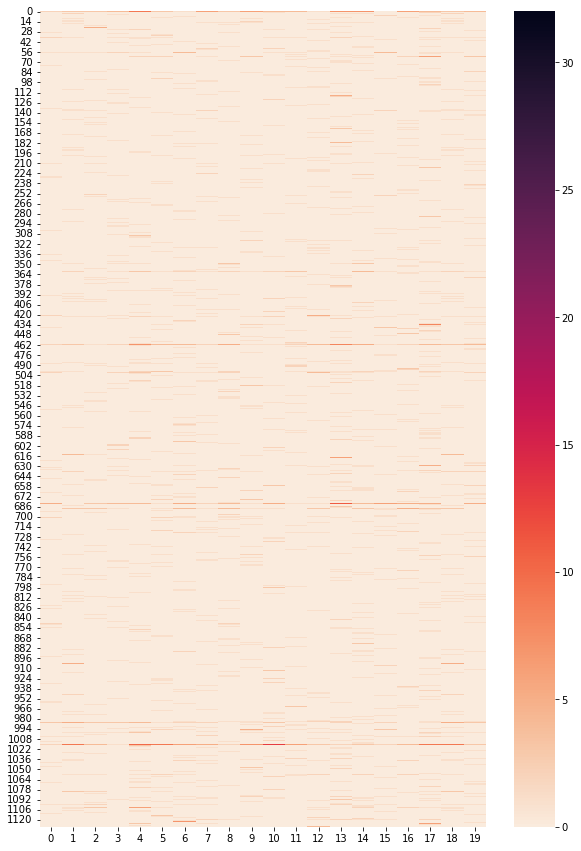

In [17]:
fig = plt.figure(1, (10, 15))
sns.heatmap(A, cmap=sns.cm.rocket_r)
plt.show()


## 3.) Calculating TF-IDF

In [19]:
def tf_idf(mtx: np.matrix) -> np.matrix:
    tf, idf = np.zeros(mtx.shape), np.full((mtx.shape[0]), float(mtx.shape[1]))
    for term in range(mtx.shape[0]):
        for doc in range(mtx.shape[1]):
            tf[term, doc] = mtx[term, doc] / np.count_nonzero(mtx[:, doc])
        idf[term] = np.log10(idf[term] / np.count_nonzero(mtx[term, :]))

    return np.array([idf[term]*tf[term, :] for term in range(tf.shape[0])])

scores = tf_idf(A)
for term in scores:
    print(term)

[0.00070719 0.00071859 0.00075942 0.00097918 0.00183934 0.00061879
 0.00020819 0.00137792 0.00076815 0.00139227 0.00112792 0.00106078
 0.00022965 0.00118132 0.00136785 0.         0.00159117 0.00061031
 0.00071859 0.00084862]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01265823 0.
 0.         0.         0.         0.         0.         0.01369863
 0.         0.        ]
[0.         0.01503161 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.00529523 0.00613132 0.         0.         0.
 0.01503161 0.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01141254 0.         0.         0.
 0.         0.        ]
[0.         0.         0.         0.01429703 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0

## 4.) Calculating Cosine Similarity

In [21]:
def cosine_similarity(A: np.array, B: np.array) -> float:
    return np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))

cosine_scores = []
for i in range(scores.shape[1]):
    if i == 9:
        continue
    cosine_scores.append((i, cosine_similarity(scores[9], scores[i])))
print(sorted(cosine_scores, key=lambda x: x[1])[-3:])

[(2, 0.7709144370909513), (12, 0.8249998741150191), (13, 0.9428618068038284)]



## 5.) Creating Matrix of Common Count

In [22]:
def common_terms(A: np.array, B: np.array) -> int:
    count = 0
    for term in range(A.shape[0]):
        if A[term] != 0 and B[term] != 0:
            count += 1
    return int(count)

B = np.zeros((20,20), dtype= np.int16)
for i in range(A.shape[1]):
    for j in range(A.shape[1]):
        B[i, j] = common_terms(A[:, i], A[:, j])
for row in B:
    print(row)

[63 13 14 14 15 16 15 13 18 10 12 12  9 21 11 16  8 14 13 13]
[13 93 21 16 23 25 17 20 12 22 16 13 15 16 17 17 12 21 93 18]
[14 21 88 12 17 17 18 19  8 15 15 12 15 19 12 17 10 16 21 17]
[14 16 12 91 19 15 13 17 14 13 17 14 17 21 13 12 12 20 16 15]
[ 15  23  17  19 109  23  18  23  11  16  18  19  16  20  19  18  11  26
  23  20]
[ 16  25  17  15  23 108  17  16  13  37  18  16  14  19  14  17  14  21
  25  20]
[ 15  17  18  13  18  17 107  22  12  16  14  19  23  22  15  17  10  20
  17  21]
[13 20 19 17 23 16 22 97 16 14 20 11 17 21 22 16 12 30 20 22]
[18 12  8 14 11 13 12 16 87 14 13 11 15 19 19 12 12 14 12 14]
[10 22 15 13 16 37 16 14 14 96 18 15 14 18 13 18 11 16 22 19]
[12 16 15 17 18 18 14 20 13 18 79 14 16 21 18 16 10 18 16 18]
[12 13 12 14 19 16 19 11 11 15 14 84 15 21 15 18 11 22 13 19]
[ 9 15 15 17 16 14 23 17 15 14 16 15 97 19 18 13 14 21 15 18]
[ 21  16  19  21  20  19  22  21  19  18  21  21  19 132  19  16  12  22
  16  24]
[ 11  17  12  13  19  14  15  22  19  13  18  15